![uc3m logo](https://assets.onthehub.com/attachments/15/401d138e-5b75-de11-b7f9-0030487d8896/3d13020c-f96c-4a26-8c47-b617961e9c81.jpg)

#AA2024 - GRUPO 15 - PRÁTICA 1

**Github:** https://github.com/rosareyes/AA2024-G15-P1

---

**Integrantes:**

Rosa Reyes - 100434072

Sebastian Stoean - 100429139




## Problema transformado en clasificación



In [1]:
import pandas as pd
import warnings
import matplotlib.pyplot as plt

from google.colab import drive

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,recall_score, balanced_accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
drive.mount('/content/drive', force_remount=True)
wind_ava = pd.read_csv("/content/drive/MyDrive/AA-2024/P1/wind_ava.csv.gz", compression="gzip")

Mounted at /content/drive


In [3]:
warnings.filterwarnings("ignore")

cols_13 = ["datetime", "energy"] + [col for col in wind_ava.columns if col.endswith('.13')]

wind_ava_data = wind_ava[cols_13]

# Transformar columna de fecha y hora en características numéricas
wind_ava_data['datetime'] = pd.to_datetime(wind_ava_data['datetime'])
wind_ava_data['year'] = wind_ava_data['datetime'].dt.year
wind_ava_data['month'] = wind_ava_data['datetime'].dt.month
wind_ava_data['day'] = wind_ava_data['datetime'].dt.day
wind_ava_data['hour'] = wind_ava_data['datetime'].dt.hour


wind_ava_data.head(10)

,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,inss.13,stl4.13,fsr.13,flsr.13,u100.13,v100.13,year,month,day,hour
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,-0.138650,284.684755,0.404731,-5.927092,-1.780562,-4.443617,2005,1,2,18
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,-0.083050,284.667948,0.404920,-5.913881,-3.743344,-3.129469,2005,1,3,0
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,-0.036241,284.651914,0.405704,-5.908272,-5.097203,-1.157748,2005,1,3,6
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,0.098192,284.636266,0.403967,-5.961995,-4.500835,1.502478,2005,1,3,12
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,0.041844,284.620232,0.403808,-5.987860,-3.392324,2.131114,2005,1,3,18
5,2005-01-04 00:00:00,232.30,2.505768e+06,6.125948,0.000000,1.094100e+06,2.342045,2.432235,-0.153568,1.554043,...,0.144389,284.603425,0.404758,-5.957546,0.190590,5.349629,2005,1,4,0
6,2005-01-04 06:00:00,329.95,2.503477e+06,7.038564,0.000000,1.264504e+06,2.341653,2.432090,1.247802,1.676775,...,0.144389,284.585652,0.406001,-5.957198,4.105168,4.612229,2005,1,4,6
7,2005-01-04 12:00:00,960.51,2.504995e+06,7.938308,0.000000,1.247857e+06,2.341208,2.431944,2.582634,2.243500,...,0.201828,284.567493,0.405072,-5.981510,3.387434,3.809970,2005,1,4,12
8,2005-01-04 18:00:00,194.62,2.503739e+06,8.447123,0.000000,1.525480e+06,2.340816,2.431810,1.169065,2.014377,...,0.126537,284.550879,0.405413,-5.995207,3.280716,4.545374,2005,1,4,18
9,2005-01-05 00:00:00,358.51,2.505664e+06,8.417990,0.000000,1.620168e+06,2.340397,2.431665,0.808280,1.977174,...,0.111138,284.535038,0.407139,-5.965171,3.136332,4.321859,2005,1,5,0


Ahora, deberemos calcular el tercer cuartil para segregar los casos entre las categorías de energía "alta" y "baja".

In [4]:
tercer_cuantil = wind_ava_data['energy'].quantile(0.75)

print(f"Tercer cuantil de la energía producida: {tercer_cuantil}")

# Asignar etiquetas de clase
wind_ava_data['energy_class'] = wind_ava_data['energy'].apply(lambda x: 'baja' if x < tercer_cuantil else 'alta')

wind_ava_data.head(10)

Tercer cuantil de la energía producida: 1089.375


,datetime,energy,p54.162.13,p55.162.13,cape.13,p59.162.13,lai_lv.13,lai_hv.13,u10n.13,v10n.13,...,stl4.13,fsr.13,flsr.13,u100.13,v100.13,year,month,day,hour,energy_class
0,2005-01-02 18:00:00,402.71,2.510824e+06,9.186295,13.527577,1.386937e+06,2.344111,2.432983,-0.757587,-1.922799,...,284.684755,0.404731,-5.927092,-1.780562,-4.443617,2005,1,2,18,baja
1,2005-01-03 00:00:00,696.80,2.513173e+06,8.849569,6.896412,1.153526e+06,2.343719,2.432838,-1.412620,-1.403011,...,284.667948,0.404920,-5.913881,-3.743344,-3.129469,2005,1,3,0,baja
2,2005-01-03 06:00:00,1591.15,2.509627e+06,7.924080,4.774439,1.098754e+06,2.343300,2.432704,-2.290185,-0.754580,...,284.651914,0.405704,-5.908272,-5.097203,-1.157748,2005,1,3,6,alta
3,2005-01-03 12:00:00,1338.62,2.510571e+06,6.922709,0.000000,1.076021e+06,2.342830,2.432514,-3.497855,1.271028,...,284.636266,0.403967,-5.961995,-4.500835,1.502478,2005,1,3,12,alta
4,2005-01-03 18:00:00,562.50,2.505664e+06,6.646282,0.000000,1.070830e+06,2.342437,2.432369,-0.971249,0.553060,...,284.620232,0.403808,-5.987860,-3.392324,2.131114,2005,1,3,18,baja
5,2005-01-04 00:00:00,232.30,2.505768e+06,6.125948,0.000000,1.094100e+06,2.342045,2.432235,-0.153568,1.554043,...,284.603425,0.404758,-5.957546,0.190590,5.349629,2005,1,4,0,baja
6,2005-01-04 06:00:00,329.95,2.503477e+06,7.038564,0.000000,1.264504e+06,2.341653,2.432090,1.247802,1.676775,...,284.585652,0.406001,-5.957198,4.105168,4.612229,2005,1,4,6,baja
7,2005-01-04 12:00:00,960.51,2.504995e+06,7.938308,0.000000,1.247857e+06,2.341208,2.431944,2.582634,2.243500,...,284.567493,0.405072,-5.981510,3.387434,3.809970,2005,1,4,12,baja
8,2005-01-04 18:00:00,194.62,2.503739e+06,8.447123,0.000000,1.525480e+06,2.340816,2.431810,1.169065,2.014377,...,284.550879,0.405413,-5.995207,3.280716,4.545374,2005,1,4,18,baja
9,2005-01-05 00:00:00,358.51,2.505664e+06,8.417990,0.000000,1.620168e+06,2.340397,2.431665,0.808280,1.977174,...,284.535038,0.407139,-5.965171,3.136332,4.321859,2005,1,5,0,baja


## Escoger y entrenar modelo

Ya que KNN fue el mejor en regresión, podríamos probar KNeighborsClassifier para clasificación.

In [5]:
X = wind_ava_data[['year', 'month', 'day']]
y = wind_ava_data['energy_class']

test_size = wind_ava_data[wind_ava_data['datetime'].dt.year == 2009].shape[0]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=100434072)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo de clasificación KNN
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred = knn_clf.predict(X_test_scaled)

class_report = classification_report(y_test, y_pred, target_names=['baja', 'alta'])

print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(class_report)


              precision    recall  f1-score   support

        alta       0.57      0.49      0.52       197
        baja       0.87      0.90      0.88       724

    accuracy                           0.81       921
   macro avg       0.72      0.69      0.70       921
weighted avg       0.80      0.81      0.81       921

Accuracy: 0.8110749185667753

              precision    recall  f1-score   support

        baja       0.57      0.49      0.52       197
        alta       0.87      0.90      0.88       724

    accuracy                           0.81       921
   macro avg       0.72      0.69      0.70       921
weighted avg       0.80      0.81      0.81       921



# Análisis de Resultados

Podemos observar en los resultados lo siguiente:

**Clase 'alta'**

  **Precision:** De todas las instancias que el modelo predijo como 'alta', el 57% fueron correctas. Esto significa que cuando el modelo predice que la energía es 'alta', hay una buena probabilidad de que realmente sea así, pero hay margen de mejora.

 **Recall:** El modelo identificó correctamente el 49% de todas las instancias reales de la clase 'alta'. Casi la mitad de los casos que realmente son 'alta' están siendo captados por el modelo, lo que sugiere que está perdiendo muchos casos que debería estar identificando.


 **Clase 'baja'**

  **Precision**: La precisión para la clase 'baja' es del 87%, lo cual es bastante alto. Esto significa que es muy probable que una predicción de 'baja' sea correcta.

  **Recall**: El recall para la clase 'baja' es del 90%, lo que indica que el modelo es bastante bueno identificando los casos reales de 'baja'.


### **Métricas Generales**

- **Accuracy:** La precisión general del modelo es del 81.1%, lo que significa que aproximadamente 8 de cada 10 predicciones son correctas, independientemente de la clase.
- **Macro Average:** El promedio de las métricas sin tener en cuenta el desbalance de clases es del 72% para precisión, 69% para recall y 70% para f1-score.

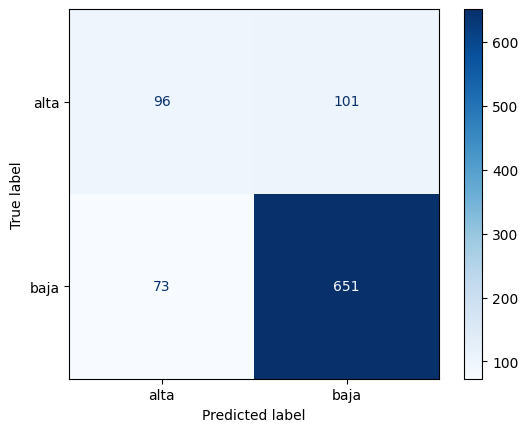

In [6]:
conf_mat = confusion_matrix(y_test, y_pred)

# Matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=knn_clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

La matriz se puede interpretar de la siguiente manera:

  - **Verdaderos Positivos (TP) para la clase 'alta':** 96 casos fueron correctamente clasificados como 'alta'.
  - **Falsos Negativos (FN) para la clase 'alta':** 101 casos fueron incorrectamente clasificados como 'baja' cuando en realidad eran 'alta'.
  - **Falsos Positivos (FP) para la clase 'alta':** 73 casos fueron incorrectamente clasificados como 'alta' cuando en realidad eran 'baja'.
  - **Verdaderos Negativos (TN) para la clase 'alta':** 651 casos fueron correctamente clasificados como 'baja'.

Esta matriz muestra que el modelo es relativamente bueno para identificar la clase 'baja', pero tiene más dificultades con la clase 'alta'.

El número de FP también indica que hay una cantidad considerable de casos 'baja' que fueron clasificados erróneamente como 'alta'.



### **Conclusiones**

En conclusión, utilizar un modelo clasificador en lugar de uno de regresión tiene sus puntos positivos y negativos.

Como puntos positivos, encontramos que su capacidad de predecir correctamente es sustancialmente mayor, ya que el modelo regresor final que construimos, no es bueno al predecir los elementos de la categoría "baja". Sin embargo, este modelo clasificador categoriza bien el 87% de los casos de esta categoría.

Por otro lado, como punto negativo, es que este modelo solo nos dice si la energía que hemos de generar es menor o mayor a 1089, sin darnos más detalle. Esto puede ser útil para saber si el día requiere más o menos producción de energía, pero no es útil para saber exactamente cuánta hay que generar.